# Análisis Exploratorio de Datos con enfoque en Rotten Tomatoes (Movies In Theaters)

### Abstract

Se buscó hacer un análisis general, y a grandes rasgos, respecto a los puntajes de las películas con más relevancia en cines. Enfocándose en la diferencia entre los puntajes de la crítica ('Tomatoer') con los de la audiencia. Llegando así, a resultados que muestran el contraste entre las opiniones del público sobre lo que se encuentra en el cine, a comparación de lo que se esperaría de la opinión *"profesional"*.

## 1. Introducción

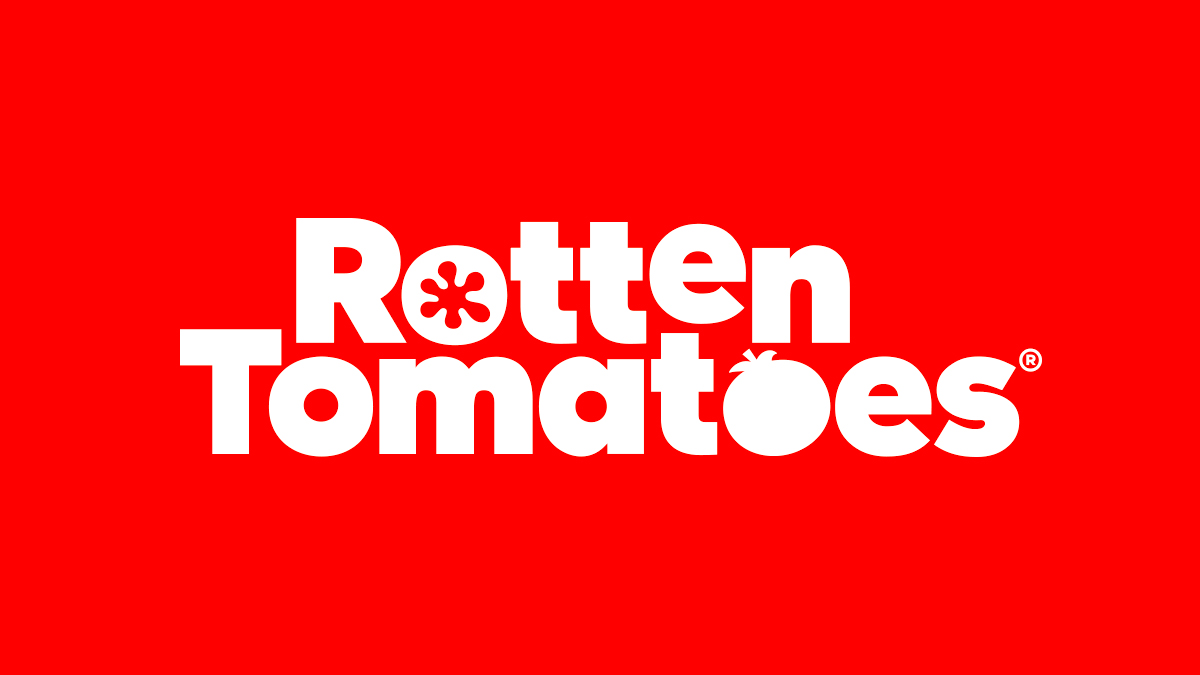

**Rotten Tomatoes** es un sitio web de revisión y reseñas para cine y televisión. 
El personal de Rotten Tomatoes primero recopila reseñas en línea de escritores que son miembros certificados de varios gremios de escritores o asociaciones de críticos de cine. Los críticos suben sus reseñas a la página de la película en el sitio web y deben marcar su reseña como "fresca" si en general es favorable o "podrida".

El sitio web realiza un seguimiento de todas las críticas contadas para cada película y calcula el porcentaje de críticas positivas.
Si las críticas positivas representan el 60% o más, la película se considera **"fresca"**, ya que una supermayoría de los revisores aprueba la película. Si las críticas positivas son inferiores al 60%, la película se considera **"podrida"**. También se calcula un **puntaje promedio** en una escala de 0 a 10. 

El análisis se baso en una muestra sobre los puntajes de las **películas que están actualmente en cines**, comparando y contrastando la opinión "popular" de la "crítica".

## 2. Exploración de Datos

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Web_Scrap/dataset/On-Theaters-Rotten-Tomatoes-12-08-2023.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Titles          102 non-null    object
 1   Critics Score   102 non-null    object
 2   Audience Score  102 non-null    object
 3   Premiere        102 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


### Puntajes por Crítica

1. Se utilizan únicamente las películas cuyo puntaje sea diferente a *Sin calificación*

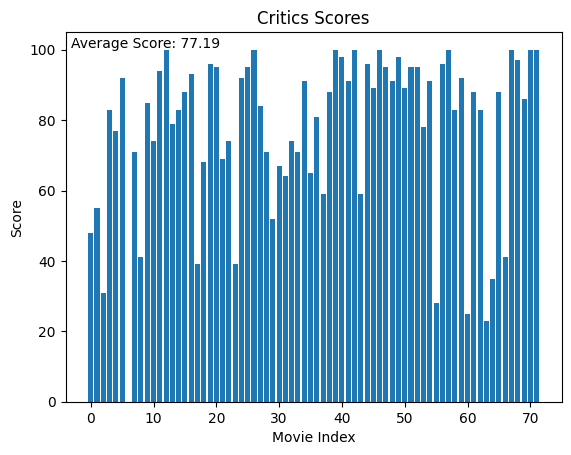

In [11]:
criticas=[]
for item in df['Critics Score']:
    if item!="Sin calificación":
        criticas.append(item)

criticas=[int(num) for num in criticas]
indicescrit = list(range(len(criticas)))

mediacricticas=np.mean(criticas)

plt.bar(indicescrit,criticas)
plt.xlabel('Movie Index')
plt.ylabel('Score')
plt.title('Critics Scores')
plt.annotate(f'Average Score: {round(mediacricticas,2)}', xy=(-3.20,100.5))
plt.show()

### Puntajes por Audiencia

1. Se utilizan únicamente las películas cuyo puntaje sea diferente a *Sin calificación*
3. El público general tiene una opinión más positiva con respecto a las películas en cartelera

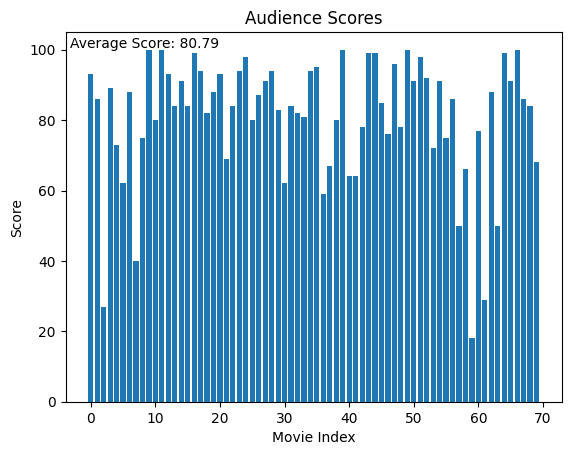

In [12]:
audiencia=[]
for item in df['Audience Score']:
    if item!="Sin calificación":
        audiencia.append(item)

audiencia=[int(num) for num in audiencia]
indicesaud = list(range(len(audiencia)))

mediaaud=np.mean(audiencia)

plt.bar(indicesaud,audiencia)
plt.xlabel('Movie Index')
plt.ylabel('Score')
plt.title('Audience Scores')
plt.annotate(f'Average Score: {round(mediaaud,2)}', xy=(-3.20,100.5))
plt.show()


### Comparativa de Puntajes

1. Se utilizan únicamente las películas cuyo puntaje crítico y público sean diferentes a *Sin calificación*, para tener una comparativa más acertada

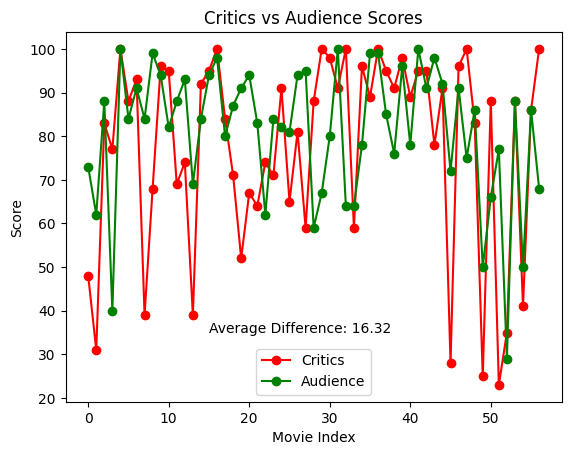

In [13]:
scores_criticas=[]
scores_audience=[]

for index, row in df.iterrows():
    critics_score = row['Critics Score']
    audience_score = row['Audience Score']
    
    if critics_score != "Sin calificación" and audience_score != "Sin calificación":
        scores_criticas.append(critics_score)
        scores_audience.append(audience_score)
    else:
        pass

#pasar a enteros
scores_criticas=[int(num) for num in scores_criticas]
scores_audience=[int(num) for num in scores_audience]


diferencias=[]
for i in range (len(scores_criticas)):
    r=(scores_audience[i])-(scores_criticas[i])
    diferencias.append(r)
    diferencias=[abs(numero) for numero in diferencias]

media_total=np.mean(diferencias)

#crear gráfico
indices = list(range(len(scores_criticas)))
plt.plot(indices, scores_criticas, label='Critics', marker='o', color='red')
plt.plot(indices, scores_audience, label='Audience', marker='o',color='green')
plt.xlabel('Movie Index')
plt.ylabel('Score')
plt.title('Critics vs Audience Scores')
plt.legend()

plt.annotate(f'Average Difference: {round(media_total,2)}', xy =(15, 35))
plt.show()

1. Se observa una gran diferencia entre los puntajes de los críticos contra la audiencia.
2. Las películas en cartelera tienen puntajes muy variados (se va a extremos).


## 3. Conclusiones

El análisis realizado sobre las películas que, actualmente están en cartelera, y sus calificaciones en Rotten Tomatoes, muestran las siguientes conclusiones:
1. El público suele tener una mejor opinión que la crítica.
2. Las películas actuales tienen puntajes extremistas; donde puede haber una crítica muy positiva o muy negativa.
3. Suele haber mucho contraste entre los puntajes de la crítica y la audiencia.

Estos resultados generales, pueden ayudar a marcar tendencias en como una película puede ser recibida por la audiencia a partir de las calificaciones preliminares de la crítica. 